In [39]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import QFT
from qiskit.visualization import circuit_drawer
from qiskit.circuit.library.standard_gates import CU1Gate
import numpy as np

In [40]:
pi = np.pi

In [41]:
q = QuantumRegister(5,'q')
c = ClassicalRegister(5,'c')

In [42]:
for i in range(0, 3):
  circuit = QuantumCircuit(q,c)

In [43]:
circuit.x(q[4])
circuit.x(q[2])
circuit.x(q[0])

In [44]:
num_qubits = 5
circuit.append(QFT(num_qubits=num_qubits, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=True, name='qft'), qargs=list(range(num_qubits)))
circuit.append(QFT(num_qubits=num_qubits, approximation_degree=0, do_swaps=True, inverse=True, insert_barriers=True, name='qft'), qargs=list(range(num_qubits)))

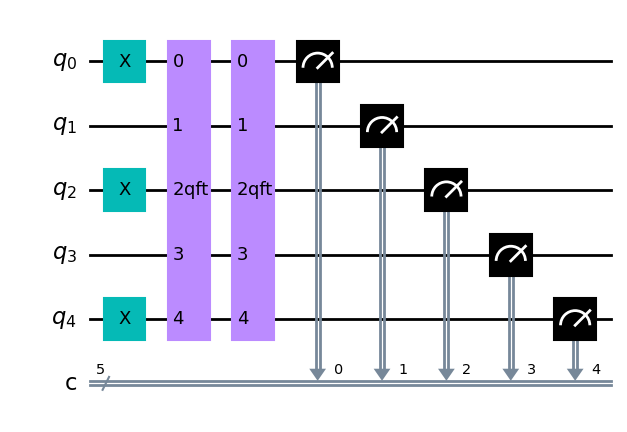

In [45]:
circuit.measure(q,c)
circuit.draw(output='mpl',filename='qft2.png')

In [46]:
print("QFT Circuit:")
print(circuit_drawer(circuit, output='text'))

QFT Circuit:
     ┌───┐┌──────┐┌──────┐┌─┐            
q_0: ┤ X ├┤0     ├┤0     ├┤M├────────────
     └───┘│      ││      │└╥┘┌─┐         
q_1: ─────┤1     ├┤1     ├─╫─┤M├─────────
     ┌───┐│      ││      │ ║ └╥┘┌─┐      
q_2: ┤ X ├┤2 qft ├┤2 qft ├─╫──╫─┤M├──────
     └───┘│      ││      │ ║  ║ └╥┘┌─┐   
q_3: ─────┤3     ├┤3     ├─╫──╫──╫─┤M├───
     ┌───┐│      ││      │ ║  ║  ║ └╥┘┌─┐
q_4: ┤ X ├┤4     ├┤4     ├─╫──╫──╫──╫─┤M├
     └───┘└──────┘└──────┘ ║  ║  ║  ║ └╥┘
c: 5/══════════════════════╩══╩══╩══╩══╩═
                           0  1  2  3  4 


In [47]:
print(circuit)

     ┌───┐┌──────┐┌──────┐┌─┐            
q_0: ┤ X ├┤0     ├┤0     ├┤M├────────────
     └───┘│      ││      │└╥┘┌─┐         
q_1: ─────┤1     ├┤1     ├─╫─┤M├─────────
     ┌───┐│      ││      │ ║ └╥┘┌─┐      
q_2: ┤ X ├┤2 qft ├┤2 qft ├─╫──╫─┤M├──────
     └───┘│      ││      │ ║  ║ └╥┘┌─┐   
q_3: ─────┤3     ├┤3     ├─╫──╫──╫─┤M├───
     ┌───┐│      ││      │ ║  ║  ║ └╥┘┌─┐
q_4: ┤ X ├┤4     ├┤4     ├─╫──╫──╫──╫─┤M├
     └───┘└──────┘└──────┘ ║  ║  ║  ║ └╥┘
c: 5/══════════════════════╩══╩══╩══╩══╩═
                           0  1  2  3  4 


In [48]:
from qiskit_aer import AerSimulator
from qiskit import transpile

In [49]:
backend = AerSimulator()

In [50]:
qc_compiled = transpile(circuit, backend)

In [51]:
job_sim = backend.run(qc_compiled, shots=1000)
result_sim = job_sim.result()


In [52]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'10101': 1000}


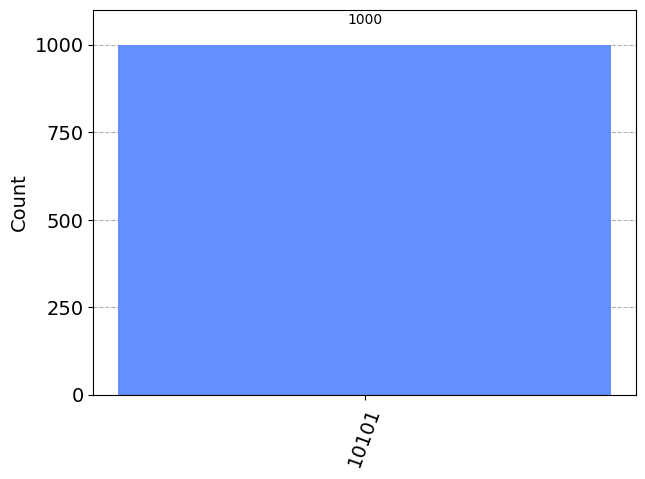

In [53]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [56]:
def qft(circuit, n):
    # Apply Hadamard gates
    for j in range(n):
        circuit.h(j)
        for k in range(j+1, n):
            angle = pi / float(2**(k-j))
            circuit.append(CU1Gate(angle), [j, k])
            
num_qubits = 5
qft_circuit = QuantumCircuit(num_qubits)

qft(qft_circuit, num_qubits)
qft_circuit.draw(output='mpl',filename='qft2_circuit.png')
print(qft_circuit)


     ┌───┐                                                                  »
q_0: ┤ H ├─■─────────■──────────────■───────────────────■───────────────────»
     └───┘ │U1(π/2)  │        ┌───┐ │                   │                   »
q_1: ──────■─────────┼────────┤ H ├─┼─────────■─────────┼──────────■────────»
                     │U1(π/4) └───┘ │         │U1(π/2)  │          │        »
q_2: ────────────────■──────────────┼─────────■─────────┼──────────┼────────»
                                    │U1(π/8)            │          │U1(π/4) »
q_3: ───────────────────────────────■───────────────────┼──────────■────────»
                                                        │U1(π/16)           »
q_4: ───────────────────────────────────────────────────■───────────────────»
                                                                            »
«                                                            
«q_0: ───────────────────────────────────────────────────────
«                 